# Overlay of the Koshino model bands on the CSC model

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
k_mags_path = '/Users/jonathanlu/Documents/tmos2_2/ov6/kmags.npy'
csc_path = '/Users/jonathanlu/Documents/tmos2_2/ov6/modes.npy'
kosh_path = '/Users/jonathanlu/Documents/tmos2_2/band_koshino_6.0.npz'

In [56]:
k_mags = np.load(k_mags_path)
csc_modes = np.load(csc_path)
nmodes = csc_modes.shape[1]
kosh_modes = np.load(kosh_path)
kosh_nmodes = kosh_modes.shape[1]
kosh_mags = np.linspace(k_mags[0], k_mags[-1], len(kosh_modes))

In [59]:
adjusted_kosh_modes = 18*kosh_modes

<Figure size 432x288 with 0 Axes>

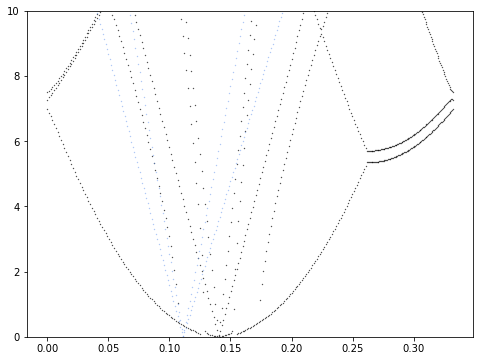

In [60]:
# Plot the CSC modes above the Koshino modes 
plt.clf()
plt.figure(figsize=(8, 6))
for i, k_mag in enumerate(k_mags):
    plt.scatter([k_mag]*nmodes, csc_modes[i], s=0.1, c='k')
plt.ylim(bottom=0, top=10)

for i, k_mag in enumerate(kosh_mags):
    plt.scatter([k_mag]*kosh_nmodes, adjusted_kosh_modes[i], c='cornflowerblue', s=0.1, alpha=0.75)
plt.show()